In [1]:
from pyscf import gto, dft
mol_hf = gto.M(atom = 'H 0 0 0; F 0 0 1.1', basis = '6-31g', symmetry = True)
mf_hf = dft.RKS(mol_hf)
mf_hf.xc = 'b3lyp'
energy = mf_hf.kernel()
g_2 = mf_hf.nuc_grad_method() 
force = g_2.kernel()

converged SCF energy = -100.351093597227
--------------- SymAdaptedRKS gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000    -0.0874258050
1 F     0.0000000000     0.0000000000     0.0874230515
----------------------------------------------


In [4]:
force

array([[ 0.        ,  0.        , -0.08742581],
       [ 0.        ,  0.        ,  0.08742305]])

In [3]:
import numpy as np
MOL_LST2 = np.load("h_mol_lst.npy", allow_pickle=True)

In [2]:
total_num = len(MOL_LST2)

In [7]:
from rdkit import Chem
import py3Dmol
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

In [4]:
def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    # viewer.addPropertyLabels("atom","","")

    # for i, at in enumerate(mol):
    #     default = {"stick": {'color': 'black'}}
    #     viewer.setStyle({'model': -1, 'serial': i+1}, at.get("pymol", default))

    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer


In [15]:
test_mol = MOL_LST2[0]
viewer = MolTo3DView(test_mol, size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

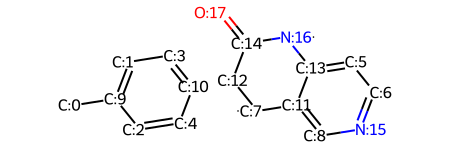

In [16]:
def show_atom_number(mol, label):
    # mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp(label, str(i))
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol
show_atom_number(test_mol, 'molAtomMapNumber')

In [17]:
import pyscf
from pyscf import gto, lo, tools, dft 

elements = [atom.GetSymbol() for atom in test_mol.GetAtoms()]
coordinates = test_mol.GetConformer().GetPositions()
atoms = [(element, coordinate) for element, coordinate in zip(elements, coordinates)]

pyscf_mole = gto.Mole(basis="sto-3g")
pyscf_mole.atom = atoms
pyscf_mole.build()

In [21]:
# mf = dft.RKS(pyscf_mole)
# mf.xc = 'b3lyp'
# mf.run();
# mol_hf = gto.M(atom = 'H 0 0 0; F 0 0 1.1', basis = '6-31g', symmetry = True)
# mf_hf = dft.RKS(pyscf_mole)
mf_df = dft.RKS(pyscf_mole)
mf_hf.xc = 'b3lyp'
energy = mf_hf.kernel()
g_2 = mf_hf.nuc_grad_method() 
force = g_2.kernel()

: 

: 

In [2]:
# generate rdkit conformations
import copy
test_mol = copy.deepcopy(MOL_LST2[0])

# delete the org conformer
org_conf = test_mol.GetConformer(id=0)
# print(conf.GetPositions())
# viewer = MolTo3DView(test_mol, size=(600, 300), style='stick')
# viewer.show()

NameError: name 'MOL_LST2' is not defined

In [10]:
test_mol.RemoveConformer(0)
cids = AllChem.EmbedMultipleConfs(test_mol, numConfs=1, numThreads=0)
conf = test_mol.GetConformer(id=0)
# print(conf.GetPositions())
# viewer = MolTo3DView(test_mol, size=(600, 300), style='stick')
# viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
rdkit_conf_lst = []
from tqdm import tqdm
rdkit_failed_cnt = 0
rdkit_conf_mol_lst = []
for mol in tqdm(MOL_LST2):
    test_mol = copy.deepcopy(mol)
    test_mol.RemoveConformer(0)
    cids = AllChem.EmbedMultipleConfs(test_mol, numConfs=1, numThreads=0)
    if len(cids) < 1:
        rdkit_failed_cnt += 1
        print('rdkit generate fail')
    rdkit_conf_mol_lst.append(test_mol)


  0%|          | 171/3378606 [00:04<30:33:51, 30.70it/s]

rdkit generate fail


  0%|          | 330/3378606 [00:09<84:09:57, 11.15it/s] 

rdkit generate fail


  0%|          | 373/3378606 [00:12<97:44:18,  9.60it/s] 

rdkit generate fail


  0%|          | 385/3378606 [00:14<158:39:38,  5.91it/s]

rdkit generate fail


  0%|          | 390/3378606 [00:17<266:16:08,  3.52it/s]

rdkit generate fail


  0%|          | 458/3378606 [00:19<21:48:59, 43.01it/s] 

rdkit generate fail


  0%|          | 467/3378606 [00:22<130:41:37,  7.18it/s]

rdkit generate fail


  0%|          | 571/3378606 [00:25<69:32:07, 13.49it/s] 

rdkit generate fail


  0%|          | 693/3378606 [00:29<41:24:17, 22.66it/s]

rdkit generate fail


  0%|          | 740/3378606 [00:30<22:46:10, 41.21it/s]

rdkit generate fail


  0%|          | 749/3378606 [00:33<141:33:07,  6.63it/s]

rdkit generate fail


  0%|          | 1027/3378606 [00:43<161:26:05,  5.81it/s]

rdkit generate fail


  0%|          | 1119/3378606 [00:46<38:38:29, 24.28it/s] 


KeyboardInterrupt: 

: 